<a href="https://colab.research.google.com/github/MichaelVanHouHei/-/blob/main/db927283_MachineLearning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/gdrive/')
!unzip '/gdrive/My Drive/Colab Notebooks/TrafficSignData.zip'

串流輸出內容已截斷至最後 5000 行。
  inflating: TrafficSignData/Training/00010/00021_00015.ppm  
  inflating: TrafficSignData/Training/00010/00021_00016.ppm  
  inflating: TrafficSignData/Training/00010/00021_00017.ppm  
  inflating: TrafficSignData/Training/00010/00021_00018.ppm  
  inflating: TrafficSignData/Training/00010/00021_00019.ppm  
  inflating: TrafficSignData/Training/00010/00021_00020.ppm  
  inflating: TrafficSignData/Training/00010/00021_00021.ppm  
  inflating: TrafficSignData/Training/00010/00021_00022.ppm  
  inflating: TrafficSignData/Training/00010/00021_00023.ppm  
  inflating: TrafficSignData/Training/00010/00021_00024.ppm  
  inflating: TrafficSignData/Training/00010/00021_00025.ppm  
  inflating: TrafficSignData/Training/00010/00021_00026.ppm  
  inflating: TrafficSignData/Training/00010/00021_00027.ppm  
  inflating: TrafficSignData/Training/00010/00021_00028.ppm  
  inflating: TrafficSignData/Training/00010/00021_00029.ppm  
  inflating: TrafficSignData/Training/00010/00022

In [ ]:
import threading
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
ROOT = './TrafficSignData/Training'
def readAllCsv():
    dfs = []
    for i in range(0,15): #denote that we have 15 class ( in each folder we have one csv with images)
        prefix = ROOT + '/' + format(i, '05d') + '/' # subdirectory for class
        dfs.append(pd.read_csv(prefix + 'GT-'+ format(i, '05d') + '.csv',sep=';'))
    return pd.concat(dfs)


In [ ]:
all_csv = readAllCsv() 
all_csv.head()



,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0
4,00000_00004.ppm,30,32,5,6,25,26,0


In [ ]:
all_csv.shape

(15540, 8)

In [ ]:
width = all_csv['Width'] 
height = all_csv['Height']
max_width =width.max()
max_height=height.max() 
min_width=width.min() 
mix_heght=height.min() 
avg_width = width.mean() 
avg_height = height.mean()
print('max width:' , max_width ,' max height' , max_height , 'min width' , min_width, 'min height' , mix_heght , 'avg width' , avg_width , 'avg height',avg_height )

max width: 224  max height 211 min width 25 min height 25 avg width 49.22528957528957 avg height 49.05649935649936


In [ ]:
all_csv.value_counts()

Filename         Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
00000_00000.ppm  25     25      5       5       20      20      13         1
00026_00002.ppm  32     32      6       5       27      27      2          1
00026_00000.ppm  26     25      6       5       21      20      3          1
                        27      6       6       21      21      10         1
                 27     26      5       6       22      21      5          1
                                                                          ..
00012_00004.ppm  30     32      6       6       25      27      1          1
                 31     31      6       5       26      25      3          1
                        32      6       6       26      27      9          1
                 32     32      6       6       27      27      4          1
00049_00029.ppm  111    111     10      10      102     102     1          1
Length: 15540, dtype: int64

In [ ]:
all_csv.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000,15540.000000
mean,49.225290,49.056499,5.922651,5.895560,43.677606,43.522265,7.121622
std,22.620406,21.972416,1.343386,1.299965,21.525317,20.931754,4.216151
min,25.000000,25.000000,3.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,34.000000,5.000000,5.000000,29.000000,29.000000,3.000000
50%,42.000000,42.000000,6.000000,6.000000,37.000000,37.000000,7.000000
75%,56.000000,56.000000,6.000000,6.000000,51.000000,51.000000,11.000000
max,224.000000,211.000000,19.000000,18.000000,205.000000,193.000000,14.000000


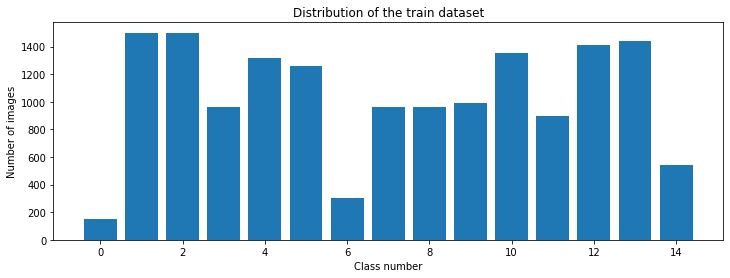

In [ ]:
%matplotlib inline
plt.figure(figsize=(12, 4))
plt.bar(range(0, 15), all_csv.groupby('ClassId')['ClassId'].count())
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

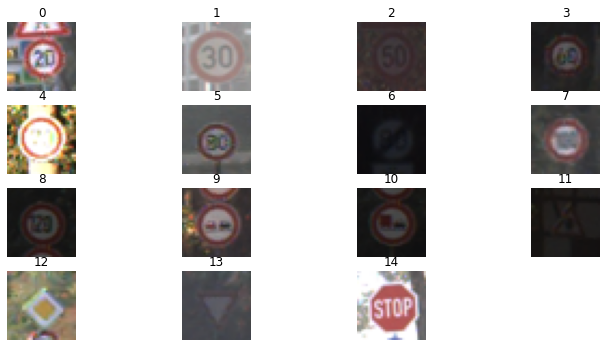

In [ ]:

plt.figure(figsize=(12, 16.5))
grouped = all_csv.groupby('ClassId')
for i in range(0, 15):
    plt.subplot(11, 4, i+1)
    prefix = ROOT + '/' + format(i, '05d') + '/'
    img=Image.open(prefix + grouped.nth(1)['Filename'][i])  # the 1th column is the filename
    img=img.resize((32,32), Image.BICUBIC)
    #draw the first image of each class
    plt.imshow(img) 
    plt.title(i)
    plt.axis('off')
     
plt.show()

(-0.5, 31.5, 31.5, -0.5)

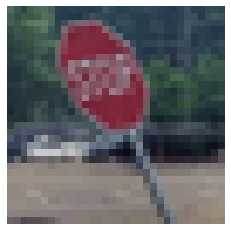

In [ ]:
img=Image.open("./test1.ppm")  # the 1th column is the filename
img=img.resize((32,32), Image.BICUBIC)
    #draw the first image of each class
plt.imshow(img) 
 
plt.axis('off')